## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Combine the data into a single dataset


In [4]:
mouse_study = pd.merge(mouse_metadata, study_results,
                                how="left", on=["Mouse ID", "Mouse ID"])



## Display the data table for preview


In [5]:
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
mouse_study.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


## The number of mice is **249**.

In [7]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [8]:
mouse_study# 1892 ROWS OF VALUES, 1 HEADER ROW = 1893 ROWS

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
mouse_study.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
a203      Infubinol     Female  20          23          0          45.000000           0                   1
q597      Ramicane      Male    20          25          40         44.471821           2                   1
q633      Zoniferol     Male    12          25          10         49.001866           0                   1
                                                        5          47.183802           0                   1
                                                                                                          ..
i177      Ramicane      Male    10          18          45         33.562402           3                   1
                                                        40         35.557933           2                   1
                        

## The duplicate mouse ID number is **g989**.

## All the data for the duplicate mouse ID **g989**.



In [10]:
mouse_study.loc[mouse_study["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


## Steps taken to create a clean DataFrame.

### After seeing the duplicate Timepoints for mouse ID **g989**, I decided to remove those duplicates and keep the latest Timepoint with the greatest Tumor Volume.

### There appeared to still be viable data associated with mouse ID g989.  Rather than drop that mouse ID, I tried to keep the rest of the data.

### I felt keeping the largest tumor volume at the latest timepoint erred on the conservative side.

In [11]:
# mouse_study.drop_duplicates(keep='last')
# DID NOT WORK!

In [12]:
# pd.reset_option('display.max_rows')

In [13]:
# Groupby and sort by max so largest tumor volume can be kept while dropping the other duplicates
mouse_unique = mouse_study.groupby(["Mouse ID", "Drug Regimen", "Sex", "Age_months",
                                    "Weight (g)", "Timepoint",
                                   "Metastatic Sites"], as_index=False)["Tumor Volume (mm3)"].max()

mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


## Optional: Get all the data for the duplicate mouse ID.


In [14]:

mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]

# DUPLICATE Timepoint = 15 (WAS 13 ROWS, NOW 9 ROWS FOR g989)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
590,g989,Propriva,Female,21,26,15,1,51.325852
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [15]:
mouse_unique = mouse_unique.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
mouse_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [16]:
mouse_unique.loc[mouse_unique["Mouse ID"]=="g989"]
#DUPLICATE GONE FOR g989 (8 ROWS NOW)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
586,g989,Propriva,Female,21,26,0,0,45.000000
587,g989,Propriva,Female,21,26,5,0,48.786801
588,g989,Propriva,Female,21,26,10,0,51.745156
589,g989,Propriva,Female,21,26,15,0,53.442020
591,g989,Propriva,Female,21,26,20,1,55.326122
592,g989,Propriva,Female,21,26,25,1,56.045564
593,g989,Propriva,Female,21,26,30,1,59.082294
594,g989,Propriva,Female,21,26,35,2,62.570880


In [17]:
mouse_unique.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Metastatic Sites  Tumor Volume (mm3)
a203      Infubinol     Female  20          23          0          0                 45.000000             1
q597      Ramicane      Male    20          25          40         2                 44.471821             1
q633      Zoniferol     Male    12          25          10         0                 49.001866             1
                                                        5          0                 47.183802             1
                                                        0          0                 45.000000             1
                                                                                                          ..
i334      Ramicane      Female  8           20          5          0                 41.020518             1
                                                        0          0                 45.000000             1
i177      Ramicane      

In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# cleanded DataFrame by dropping duplicate Timepoint for Mouse ID = g989 and keeping the greatest tumor volume 
mouse_unique


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,0,0,45.000000
1,a203,Infubinol,Female,20,23,5,0,48.508468
2,a203,Infubinol,Female,20,23,10,1,51.852437
3,a203,Infubinol,Female,20,23,15,1,52.777870
4,a203,Infubinol,Female,20,23,20,1,55.173336
...,...,...,...,...,...,...,...,...
1884,z969,Naftisol,Male,9,30,25,2,63.145652
1885,z969,Naftisol,Male,9,30,30,3,65.841013
1886,z969,Naftisol,Male,9,30,35,4,69.176246
1887,z969,Naftisol,Male,9,30,40,4,70.314904


In [19]:
# Checking the number of mice in the clean DataFrame.
mouse_unique.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Metastatic Sites         5
Tumor Volume (mm3)    1640
dtype: int64

## Cleaned DataFrame by dropping duplicate Timepoints for mouse ID = g989 and keeping the greatest tumor volume

### Number of Mice stil 249 - BUT WITH NO DUPLICATE TIMEPOINTS!!!

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_mean = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()#as_index=False keeps column header for Tumor Volume
regimen_mean


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [21]:
type(regimen_mean)

pandas.core.frame.DataFrame

In [22]:
regimen_mean.columns = ["Drug Regimen", "mean"]
regimen_mean

,Drug Regimen,mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.407029
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [23]:
reg_med = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].median()
reg_med.columns = ["Drug Regimen", "median"]
reg_med

,Drug Regimen,median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.909965
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [24]:
reg_sem = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].sem()
reg_sem.columns = ["Drug Regimen", "SEM"]
reg_sem

,Drug Regimen,SEM
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.525859
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [25]:
reg_var = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].var()
reg_var.columns = ["Drug Regimen", "var"]
reg_var

,Drug Regimen,var
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.138358
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [26]:
reg_std = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].std()
reg_std.columns = ["Drug Regimen", "std"]
reg_std

,Drug Regimen,std
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.567980
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [27]:
summary_reg = pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]})

summary_reg


,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


### Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [28]:
summary_reg = round(pd.DataFrame({"Drug Regimen": regimen_mean["Drug Regimen"], "mean":regimen_mean["mean"],
                                      "median": reg_med["median"], "var":reg_var["var"],
                                      "std": reg_std["std"], "SEM": reg_sem["SEM"]}),2)

summary_reg

,Drug Regimen,mean,median,var,std,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.41,50.91,43.14,6.57,0.53
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


In [29]:
reg_agg = mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem'])
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.407029,50.909965,43.138358,6.567980,0.525859
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Using the aggregation method, produce the same summary statistics in a single line



In [30]:
reg_agg = round(mouse_unique.groupby(["Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].agg([np.mean, np.median,
                                                                                            np.var, np.std,'sem']),2)
reg_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.41,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



### Checking individual drug names to confirm the counts of Timepoints for Mouse IDs for each Drug Regimen make sense.
  * #### LEFT ALL THIS CHECKING WORK IN pymaceuticals-working Jupyter Notebook.

In [31]:
dmt_sum = mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].count()
#dmt_sum

### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


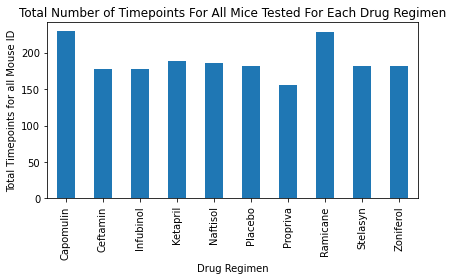

In [32]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and "Timepoint"].count().plot(kind='bar',
                                                                              ylabel='Total Timepoints for all Mouse ID',
                                                                             title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")
# MATCHES CALCULATIONS PER Drug Regimen!!
# USES .plot(kind='bar',...)

### ANOTHER WAY:

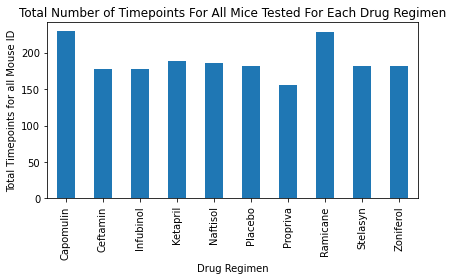

In [33]:
mouse_unique.groupby(["Drug Regimen"])["Mouse ID" and
                                       "Timepoint"].count().plot.bar("Drug Regimen",
                                                                   ylabel="Total Timepoints for all Mouse ID",
                                                                  title='Total Number of Timepoints For All Mice Tested For Each Drug Regimen')
plt.tight_layout()
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen",transparent=True)
#plt.savefig("plots/DataFrame Bar Chart2 - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")


## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

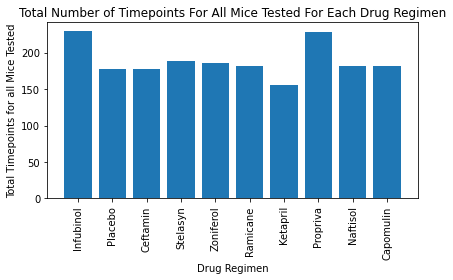

In [34]:


drug_names = mouse_unique["Drug Regimen"].unique()
# print(drugs)
x_axis = np.arange(len(drug_names))
# x_axis

y_axis = np.arange(len(dmt_sum))
# y_axis

plt.title("Total Number of Timepoints For All Mice Tested For Each Drug Regimen")
plt.ylabel("Total Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.bar(drug_names, dmt_sum, align="center")

plt.tight_layout()
#plt.savefig("plots/pyplot Bar Chart - Total Timepoints For All Mice Tested For Each Drug Regimen.pdf")




## Generate a pie plot showing the distribution of female versus male mice using Pandas

In [35]:

sex_drugs = mouse_unique.groupby(["Sex"])["Sex" and "Drug Regimen"].count()
sex_drugs


Sex
Female    930
Male      958
Name: Drug Regimen, dtype: int64

In [36]:
def func(pct):
    return "{:1.1f}%".format(pct)

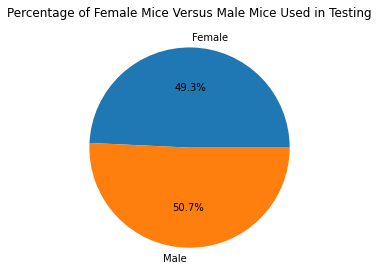

In [37]:
sex_drugs.plot.pie(title='Percentage of Female Mice Versus Male Mice Used in Testing', ylabel='',
                                 y="Percent Female", labels=["Female","Male"],
                                 autopct=lambda pct: func(pct))

plt.tight_layout()
#plt.savefig("plots/DataFrame Pie Chart - Percentage Female Mice Versus Male Mice used in Testing.pdf")



## Generate a pie plot showing the distribution of female versus male mice using pyplot


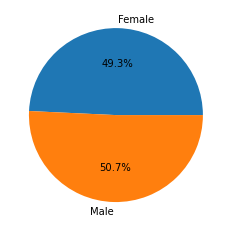

In [38]:

data_set = sex_drugs
#y="Percent Female"
my_labels = ["Female","Male"]
plt.pie(data_set, labels = my_labels, autopct=lambda pct: func(pct))
plt.show()

## I wanted to see what percentage of females were used for each drug regimen.

  * #### I left all that work in my pymaceuticals-working file

  * #### Keep getting percent female as labels with autopercent for size of each wedge corresponding to drug.

  * #### Want percent female as labels but text inside each wedge to be drug name.

  * #### Really want the following with drug names as labels, but want percentage female to be within wedges.

  * #### Finally did this exploded pie which helps tell the story better.

  * #### This is the best I could get without doing a nested pie chart (a donut).
  * #### Each wedge shows a drug regimen with its percentage of overall testing.
  * #### The legend color matches the drug regimen and shows the percentage female mice used in testing of each drug.

## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the treatment regimens:
### Capomulin, Ramicane, Infubinol, and Ceftamin

In [39]:
#mouse_unique

In [40]:
final_tumor = mouse_unique.groupby(["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].max()
#final_tumor

In [41]:
final_tumor2 = mouse_unique.groupby(["Tumor Volume (mm3)"],
                                    as_index=False).max()
#final_tumor2


### Start by getting the last (greatest) timepoint for each mouse
  * #### Initially thought if I got the largest tumor volume, it would coincide with the latest timepoint. 
  * #### I thought my df final_time would give greatest timepoint and largest volume for each mouse.
  * #### Came up with df mouse_greatest gives largest volume of tumor for each mouse in specific drug regimens.
### I made the wrong assumption.
  * #### Even though resulting 100 rows which should be correct, it is oriented toward largest tumor volume
  * #### Resultant df should have 100 rows because of only one final timepoint for each of 25 mouse ID over 4 drug regimens
### I had to redo the steps used for mouse_greatest but with Timepoint instead of Tumor Volume (mm3)

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
  * #### I checked the dataframe after the merges, and they did not seem correct.
  * #### Also, it seemed I already had the data needed, and I could just continue filtering to get the desired dataframe.
  * #### Initially df specific_treatments appeared to give last timepoint at largest volume for all mice used in specific drug regimen.
  * #### df specific_treatments4 was based on mouse_unique, and this provided the basis for the df I needed.
## I proceeded to filter mouse_unique dataframe to get the tumor volume at the last timepoint for the 4 specific drug regimens.

In [42]:
specific_treatments4 = mouse_unique.loc[(lambda mouse_unique: (mouse_unique["Drug Regimen"] == "Capomulin") |
                                      (mouse_unique["Drug Regimen"] == "Ramicane") |
                                      (mouse_unique["Drug Regimen"] == "Infubinol") |
                                      (mouse_unique["Drug Regimen"] == "Ceftamin")), :]
#specific_treatments4  #814 rows
#specific_treatments4.groupby(["Drug Regimen"])["Mouse ID"].count()
#should be 230, 178, 178, 228
#now get 230, 178, 178, 228
#USE THIS ONE!!!

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint

## I obtained the required dataframe using groupby and slicing.
### DataFrame mouse_greatest gives the tumor volume at the final timepoint for the 100 mouse IDs used in the 4 drug regimens.



In [43]:
mouse_greatest = specific_treatments4.loc[specific_treatments4.groupby(["Mouse ID"])["Timepoint"].idxmax()]
#mouse_greatest# gives 100 Rows

#mouse_greatest.count() # gives 100 for each column
# code idea from: https://stackoverflow.com/questions/43899886/how-do-i-just-keep-the-rows-with-the-maximum-value-in-a-column-for-items-of-the

mouse_greatest.nunique()

Mouse ID              100
Drug Regimen            4
Sex                     2
Age_months             23
Weight (g)             16
Timepoint              10
Metastatic Sites        5
Tumor Volume (mm3)     97
dtype: int64

In [44]:
mouse_greatest
# USE THIS ONE FOR THE REST!!!

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
9,a203,Infubinol,Female,20,23,45,2,67.973419
19,a251,Infubinol,Female,21,25,45,1,65.525743
39,a275,Ceftamin,Female,20,28,45,3,62.999356
66,a411,Ramicane,Male,3,22,45,1,38.407618
76,a444,Ramicane,Female,10,25,45,0,43.047543
...,...,...,...,...,...,...,...,...
1821,y769,Ceftamin,Female,6,27,45,4,68.594745
1831,y793,Capomulin,Male,17,17,45,2,31.896238
1841,y865,Ceftamin,Male,23,26,45,3,64.729837
1858,z578,Ramicane,Male,11,16,45,0,30.638696


### Used DataFrame.to_markdown to look at the dataframes side-by-side to confirm the results needed.
  * #### This is where the merge results did not appear to work.
  * #### I left all this work in my pymaceuticals-working notebook.

In [45]:

mouse_greatest = specific_treatments4.loc[specific_treatments4.groupby(["Mouse ID"])["Timepoint"].idxmax()].sort_values(by=["Drug Regimen", "Mouse ID"])

mouse_greatest



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
183,b128,Capomulin,Female,9,22,45,2,38.982878
216,b742,Capomulin,Male,7,21,45,0,38.939633
499,f966,Capomulin,Male,16,17,20,0,30.485985
522,g288,Capomulin,Male,3,19,45,1,37.074024
542,g316,Capomulin,Female,22,22,45,2,40.159220
...,...,...,...,...,...,...,...,...
1415,s508,Ramicane,Male,1,17,45,0,30.276232
1510,u196,Ramicane,Male,18,25,45,3,40.667713
1678,w678,Ramicane,Female,5,24,5,0,43.166373
1799,y449,Ramicane,Male,19,24,15,0,44.183451


In [46]:
mouse_greatest["Drug Regimen"].unique()

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'], dtype=object)

## Put treatments into a list for for loop (and later for plot labels)
### target_drugs list
target_drugs = [Capomulin_summary, Ceftamin_summary, Infubinol_summary, Ramicane_summary]

In [47]:
Capomulin_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Capomulin"]
#Capomulin_summary
Ceftamin_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Ceftamin"]
#Ceftamin_summary
Infubinol_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Infubinol"]
#Infubinol_summary
Ramicane_summary = mouse_greatest[mouse_greatest["Drug Regimen"] == "Ramicane"]
#Ramicane_summary
target_drugs = [Capomulin_summary, Ceftamin_summary, Infubinol_summary, Ramicane_summary]
#Capomulin_summary
#target_drugs

### Create empty list to fill with tumor vol data (for plotting)
## tumor_vol_data list



In [48]:
tumor_vol = mouse_greatest[["Tumor Volume (mm3)", "Drug Regimen"]]
#type(tumor_vol)
tumor_vol.head()

,Tumor Volume (mm3),Drug Regimen
183,38.982878,Capomulin
216,38.939633,Capomulin
499,30.485985,Capomulin
522,37.074024,Capomulin
542,40.159220,Capomulin


In [49]:
#tumor_vol_data = []
#tumor_vol_data = [s["Tumor Volume (mm3)"]for s in target_drugs]
#tumor_vol_data
#print(tumor_vol_data)
tumor_data = tumor_vol.iloc[:, 0]
#tumor_data
drug_reg = tumor_vol.iloc[:, 1]
#drug_reg
tumor_drug_list = [tumor_data, drug_reg]


In [50]:
capo_summ = Capomulin_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#capo_summ
ceft_summ = Ceftamin_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#ceft_summ
infu_summ = Infubinol_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#inful_summ
rami_summ = Ramicane_summary[["Tumor Volume (mm3)", "Drug Regimen"]]#.set_index("Tumor Volume (mm3)")
#rami_summary
target_drugs_vol = [capo_summ, ceft_summ, infu_summ, rami_summ]
#target_drugs_vol
#capo_summ
tdv_concat = pd.concat(target_drugs_vol)
tdv_concat
#type(tdv_concat)
#for drug_regimen in tdv_concat:
#    tumor
#t_dat = []
#for drug_regimen in tdv_concat:
#    t_dat.append(tdv_concat["Tumor Volume (mm3)"])
#t_dat
#t_dat2 = tdv_concat["Tumor Volume (mm3)"]
#type(t_dat2)

,Tumor Volume (mm3),Drug Regimen
183,38.982878,Capomulin
216,38.939633,Capomulin
499,30.485985,Capomulin
522,37.074024,Capomulin
542,40.159220,Capomulin
...,...,...
1415,30.276232,Ramicane
1510,40.667713,Ramicane
1678,43.166373,Ramicane
1799,44.183451,Ramicane


### Calculate the IQR and quantitatively determine if there are any potential outliers. 



In [51]:
#Capomulin_summary.groupby("Tumor Volume (mm3)").quantile(.75, interpolation='higher')
#Capomulin_summary

In [52]:

Capomulin_summary.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,25.000000,25.0000,25.00000,25.000000,25.000000
mean,14.040000,20.1200,41.00000,1.280000,36.667568
std,7.850053,2.8624,10.10363,0.979796,5.715188
min,1.000000,15.0000,10.00000,0.000000,23.343598
25%,7.000000,17.0000,45.00000,1.000000,32.377357
50%,17.000000,21.0000,45.00000,1.000000,38.125164
75%,21.000000,22.0000,45.00000,2.000000,40.159220
max,24.000000,25.0000,45.00000,3.000000,47.685963


<AxesSubplot:ylabel='Frequency'>

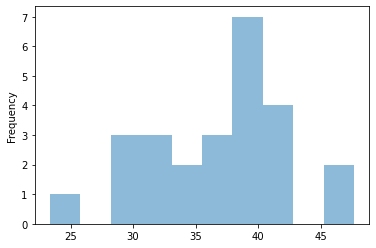

In [53]:
Capomulin_summary["Tumor Volume (mm3)"].plot.hist(alpha=0.5)

In [54]:
#Capomulin_summary["Tumor Volume (mm3)"].describe()

In [55]:
#Capomulin_summary["Tumor Volume (mm3)"].mode()

In [56]:
print(Capomulin_summary["Tumor Volume (mm3)"].median())

38.1251644


In [57]:
Tumor_Capo = Capomulin_summary["Tumor Volume (mm3)"].sort_values()
#Tumor_Capo

In [58]:
Capo_quartiles = Capomulin_summary["Tumor Volume (mm3)"].quantile([.25, .50, .75])
lowerq_Capo = Capo_quartiles[.25]
upperq_Capo = Capo_quartiles[.75]
iqr_Capo = upperq_Capo - lowerq_Capo
print(Capo_quartiles)
print(lowerq_Capo)
print(upperq_Capo)
print(iqr_Capo)

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004


In [59]:
lower_bound_Capo = lowerq_Capo - (1.5*iqr_Capo)
upper_bound_Capo = upperq_Capo + (1.5*iqr_Capo)
print(lower_bound_Capo)
print(upper_bound_Capo)

20.70456164999999
51.83201549


### There are no outliers with Capomulin since all values for Tumor Volume (mm3) are within upper bounds and lower bounds

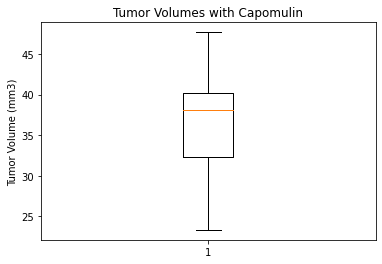

In [60]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes with Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Tumor_Capo)
plt.show()

In [61]:
quartiles = [s["Tumor Volume (mm3)"].quantile([.25,.50, .75]) for s in target_drugs_vol]
#quartiles = mouse_greatest["Tumor Volume (mm3)"].quantile([.25, .50, .75])
quartiles

[0.25    32.377357
 0.50    38.125164
 0.75    40.159220
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    48.722078
 0.50    59.851956
 0.75    64.299830
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    54.048608
 0.50    60.165180
 0.75    65.525743
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    31.560470
 0.50    36.561652
 0.75    40.659006
 Name: Tumor Volume (mm3), dtype: float64]

In [62]:
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq - lowerq


In [63]:
tumor_vol1 = mouse_greatest[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol1.head()

,Drug Regimen,Tumor Volume (mm3)
183,Capomulin,38.982878
216,Capomulin,38.939633
499,Capomulin,30.485985
522,Capomulin,37.074024
542,Capomulin,40.159220


In [64]:
columns = []
columns = ["Drug Regimen", "Tumor Volume (mm3)"]

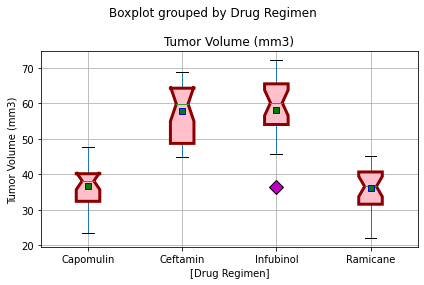

In [65]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

fig.suptitle("Tumor Volumes", fontsize=14, fontweight='bold')

ax.set_title("Tumor Volumes by " +columns[0]+ "\n\n\n")

fig.subplots_adjust(top=0.85)

# info from: https://matplotlib.org/stable/tutorials/text/text_intro.html

ax.set_ylabel(columns[1])
ax.set_xlabel(columns[0])

boxes = dict(linewidth=3, color="darkred", facecolor='pink')
magenta_diamond = dict(marker='D', markerfacecolor='m', markersize=10)
christmas_mean = dict(linewidth=3, marker='s', markeredgecolor='blue', markerfacecolor='green')

#tumor_vol1.boxplot(column=columns[1], by=columns[0], ax=ax, showmeans=True, flierprops=magenta_diamond,
#                  meanprops = christmas_mean)

tumor_vol1.boxplot(by=columns[0], ax=ax, notch='True', boxprops=boxes, flierprops=magenta_diamond,
                   meanprops=christmas_mean, showmeans=True, patch_artist=True, widths=0.25)
# settings info from: https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
# more custom fill colors from: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

plt.show()

## Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [66]:
Infubinol_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
9,a203,Infubinol,Female,20,23,45,2,67.973419
19,a251,Infubinol,Female,21,25,45,1,65.525743
106,a577,Infubinol,Female,6,25,30,2,57.031862
126,a685,Infubinol,Male,8,30,45,3,66.083066
243,c139,Infubinol,Male,11,28,45,2,72.226731


In [67]:
Infubinol_summary.describe()

,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
count,25.000000,25.00000,25.000000,25.000000,25.000000
mean,16.400000,27.32000,30.600000,1.600000,58.178246
std,7.444237,2.17409,14.600228,1.224745,8.602957
min,1.000000,23.00000,5.000000,0.000000,36.321346
25%,11.000000,25.00000,20.000000,1.000000,54.048608
50%,19.000000,27.00000,30.000000,1.000000,60.165180
75%,23.000000,29.00000,45.000000,2.000000,65.525743
max,24.000000,30.00000,45.000000,4.000000,72.226731


In [68]:
Infu_quartiles = Infubinol_summary["Tumor Volume (mm3)"].quantile([.25, .50, .75])
lowerq_Infu = Infu_quartiles[.25]
upperq_Infu = Infu_quartiles[.75]
iqr_Infu = upperq_Infu - lowerq_Infu
print(lowerq_Infu)
print(upperq_Infu)
print(iqr_Infu)
print(Infu_quartiles)

54.04860769
65.52574285
11.477135160000003
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64


In [69]:
lower_bound_Infu = lowerq_Infu - (1.5*iqr_Infu)
upper_bound_Infu = upperq_Infu + (1.5*iqr_Infu)
print(lower_bound_Infu)
print(upper_bound_Infu)

36.83290494999999
82.74144559000001


In [70]:
Tumor_Infu = Infubinol_summary["Tumor Volume (mm3)"].sort_values()
#Tumor_Infu

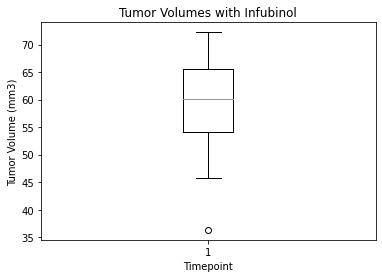

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes with Infubinol")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Timepoint")



ax1.boxplot(Tumor_Infu)
plt.show()

## Determine outliers using upper and lower bounds


In [72]:
min_Infu = Infubinol_summary["Tumor Volume (mm3)"].sort_values(ascending=True).head()
min_Infu

275     36.321346
1136    45.699331
1553    46.250112
1007    47.010364
1633    50.005138
Name: Tumor Volume (mm3), dtype: float64

In [73]:
outlier_Infubinol = Infubinol_summary.loc[(Infubinol_summary["Tumor Volume (mm3)"] < lower_bound_Infu) |
                                         (Infubinol_summary["Tumor Volume (mm3)"] > upper_bound_Infu)]
outlier_Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
275,c326,Infubinol,Female,18,25,5,0,36.321346


## ADD SUBSET

In [74]:
subset_Infubinol = Infubinol_summary.drop([275])
#subset_Infubinol

In [75]:
min_subset = subset_Infubinol["Tumor Volume (mm3)"].sort_values(ascending=True).head()
#min_subset

In [76]:
mouse_greatest.loc[mouse_greatest["Mouse ID"]=="c326"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Tumor Volume (mm3)
275,c326,Infubinol,Female,18,25,5,0,36.321346


In [77]:
mouse_greatest_subset = mouse_greatest.drop([275])

In [78]:
mouse_greatest_subset[["Drug Regimen", "Mouse ID"]].nunique()

Drug Regimen     4
Mouse ID        99
dtype: int64

In [79]:
tumor_vol2 = mouse_greatest_subset[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol2.head()

,Drug Regimen,Tumor Volume (mm3)
183,Capomulin,38.982878
216,Capomulin,38.939633
499,Capomulin,30.485985
522,Capomulin,37.074024
542,Capomulin,40.159220


## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

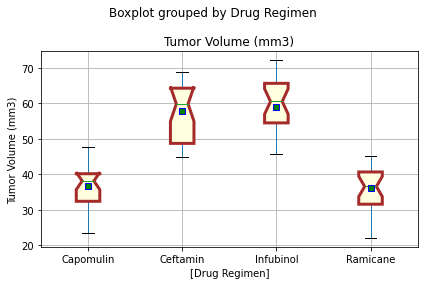

In [80]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

fig.suptitle("Tumor Volumes", fontsize=14, fontweight='bold')

ax.set_title("Tumor Volumes by " +columns[0]+ "\n\n\n")

fig.subplots_adjust(top=0.85)

# info from: https://matplotlib.org/stable/tutorials/text/text_intro.html

ax.set_ylabel(columns[1])
ax.set_xlabel(columns[0])

boxes = dict(linewidth=3, color="brown", facecolor='lightyellow')
magenta_diamond = dict(marker='D', markerfacecolor='m', markersize=10)
christmas_mean = dict(linewidth=3, marker='s', markeredgecolor='blue', markerfacecolor='green')

#tumor_vol2.boxplot(column=columns[1], by=columns[0], ax=ax, showmeans=True, flierprops=magenta_diamond,
#                  meanprops = christmas_mean)

tumor_vol2.boxplot(by=columns[0], ax=ax, notch='True', boxprops=boxes, flierprops=magenta_diamond,
                   meanprops=christmas_mean, showmeans=True, patch_artist=True, widths=0.25)
# settings info from: https://stackoverflow.com/questions/32161921/matplotlib-how-to-have-a-transparent-box-plot-face-while-a-non-transparent-line
# more custom fill colors from: https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

plt.show()

## Line and Scatter Plots

## Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [81]:
Capomulin_time_tumor = Capomulin_summary[["Timepoint","Tumor Volume (mm3)"]]

In [82]:
capo_time_data = Capomulin_time_tumor.iloc[:, 0]
#capo_time_data
capo_tumor_data = Capomulin_time_tumor.iloc[:, 1]
#capo_tumor_data
capo_time_tumor_list = [capo_tumor_data, capo_time_data]
#capo_time_tumor_list
#tumor_vol_data = [s["Tumor Volume (mm3)"]for s in target_drugs]

In [83]:
Capomulin_unique = mouse_unique.loc[mouse_unique["Drug Regimen"] == "Capomulin", :]
#Capomulin_unique.nunique()

In [84]:
Capomulin_mouse_unique = Capomulin_unique[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#Capomulin_mouse_unique

In [85]:
Capomulin_mouse_g316 = Capomulin_unique.loc[Capomulin_unique["Mouse ID"] == "g316", ["Timepoint", "Tumor Volume (mm3)"]]
Capomulin_mouse_g316
                                            

,Timepoint,Tumor Volume (mm3)
533,0,45.000000
534,5,44.022752
535,10,44.502042
536,15,45.216743
537,20,45.933322
538,25,46.809225
539,30,44.221480
540,35,44.702833
541,40,45.565821
542,45,40.159220


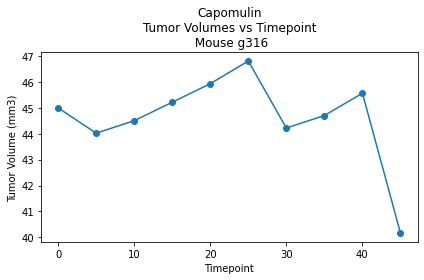

In [86]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin\nTumor Volumes vs Timepoint\n Mouse g316")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

plt.plot(Capomulin_mouse_g316["Timepoint"], Capomulin_mouse_g316["Tumor Volume (mm3)"], marker='o')

plt.show()

## Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



In [87]:
#Capomulin_unique.head()

In [88]:
Capomulin_wt_vol = Capomulin_unique.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()
#Capomulin_wt_vol

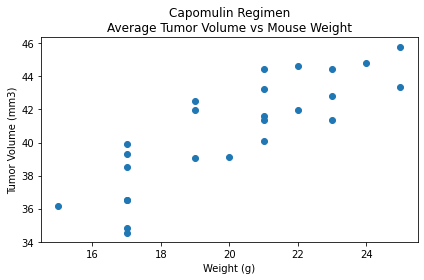

In [89]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin Regimen\nAverage Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.scatter(Capomulin_wt_vol["Weight (g)"], Capomulin_wt_vol["Tumor Volume (mm3)"], marker='o')

plt.show()

In [90]:
capo_wt = Capomulin_wt_vol.iloc[:, 0]
capo_vol = Capomulin_wt_vol.iloc[:, 1]
#capo_wt
#capo_vol

In [91]:

tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(capo_wt, capo_vol)
print(tv_slope)
print(tv_int)
print(tv_r)
print(tv_p)
print(tv_std_err)

0.7426941826944182
-10.14886316411134
0.8419363424694721
1.3225722434712404e-07
0.09924763572688554


In [92]:
capo_wt_fit = tv_slope * capo_wt + tv_int
print(f'Linear Regression for Capomulin = y = {tv_slope}(Mouse Wt) + ({tv_int})')

Linear Regression for Capomulin = y = 0.7426941826944182(Mouse Wt) + (-10.14886316411134)


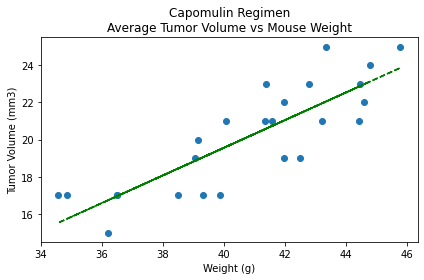

In [93]:
fig = plt.figure(tight_layout=True)
ax = fig.add_subplot()

plt.title("Capomulin Regimen\nAverage Tumor Volume vs Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.scatter(capo_wt, capo_vol, marker='o')
plt.plot(capo_wt, capo_wt_fit, "g--")

plt.show()

In [94]:
print(tv_r)
print(tv_p)
print(tv_std_err)

0.8419363424694721
1.3225722434712404e-07
0.09924763572688554


## Correlation and Regression

### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen



In [95]:
Capomulin_wt_vol.corr()
# r > 0.7 so strong correlation
# tv_r = 0.842

,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.000000,0.841936
Weight (g),0.841936,1.000000
